In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [514]:
# reading data
BigMart = pd.read_csv('BigMart_Train.csv')

### Data Preprocessing

In [515]:
# getting shape of the DataFrame
BigMart.shape

(8523, 12)

In [516]:
# getting all the columns
BigMart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [517]:
# checking for columns' dtype
BigMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [518]:
# summarizing all the numeric columns
BigMart.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
10%,6.695000,0.012042,52.795600,1985.000000,343.552800
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
90%,19.350000,0.139514,231.200480,2009.000000,4570.051200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [519]:
# Checking for Null values
BigMart.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [520]:
# handling Null values
BigMart_cleaned = BigMart.copy()
BigMart_cleaned.Item_Weight.fillna(BigMart_cleaned.Item_Weight.mean(), inplace=True)
BigMart_cleaned.Outlet_Size.fillna(BigMart_cleaned.Outlet_Size.value_counts().index[0], inplace=True)

In [521]:
# Rechecking for Null values
BigMart_cleaned.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [522]:
# removing outliers
BigMart_cleaned = BigMart_cleaned[BigMart_cleaned.Item_Outlet_Sales.between(200, 6000)]
BigMart_cleaned.reset_index(inplace=True)

In [523]:
# summarizing all the numeric columns
BigMart_cleaned.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000
mean,4266.657684,12.853149,0.064380,140.855946,1998.304023,2122.921585
std,2457.505244,4.285382,0.049746,60.792056,8.257315,1405.298476
min,0.000000,4.555000,0.000000,31.290000,1985.000000,201.071600
10%,852.500000,6.960000,0.011583,55.029800,1985.000000,498.018400
25%,2148.750000,9.300000,0.026781,95.300850,1987.000000,966.741600
50%,4262.500000,12.857645,0.052493,142.482500,1999.000000,1842.934400
75%,6388.250000,16.200000,0.093027,184.468700,2004.000000,3026.393900
90%,7670.500000,19.100000,0.135764,228.666800,2009.000000,4243.476300
max,8522.000000,21.350000,0.328391,266.888400,2009.000000,5992.200000


In [524]:
# handling categorical data
from sklearn.preprocessing import OneHotEncoder
X_cat = BigMart_cleaned.loc[:,['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
                             'Outlet_Location_Type','Outlet_Type',]]
ohe = OneHotEncoder(sparse=False)
X_cat = pd.DataFrame(ohe.fit_transform(X_cat))
X_cat.columns = ohe.get_feature_names_out()

### Feature Selection for numerical data

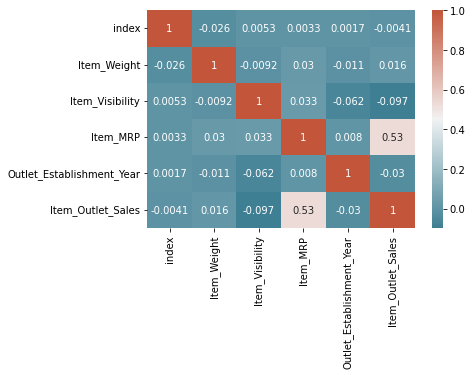

In [525]:
# correlation between the variables
corr = BigMart_cleaned.corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
               cmap=sns.diverging_palette(220, 20, as_cmap=True))

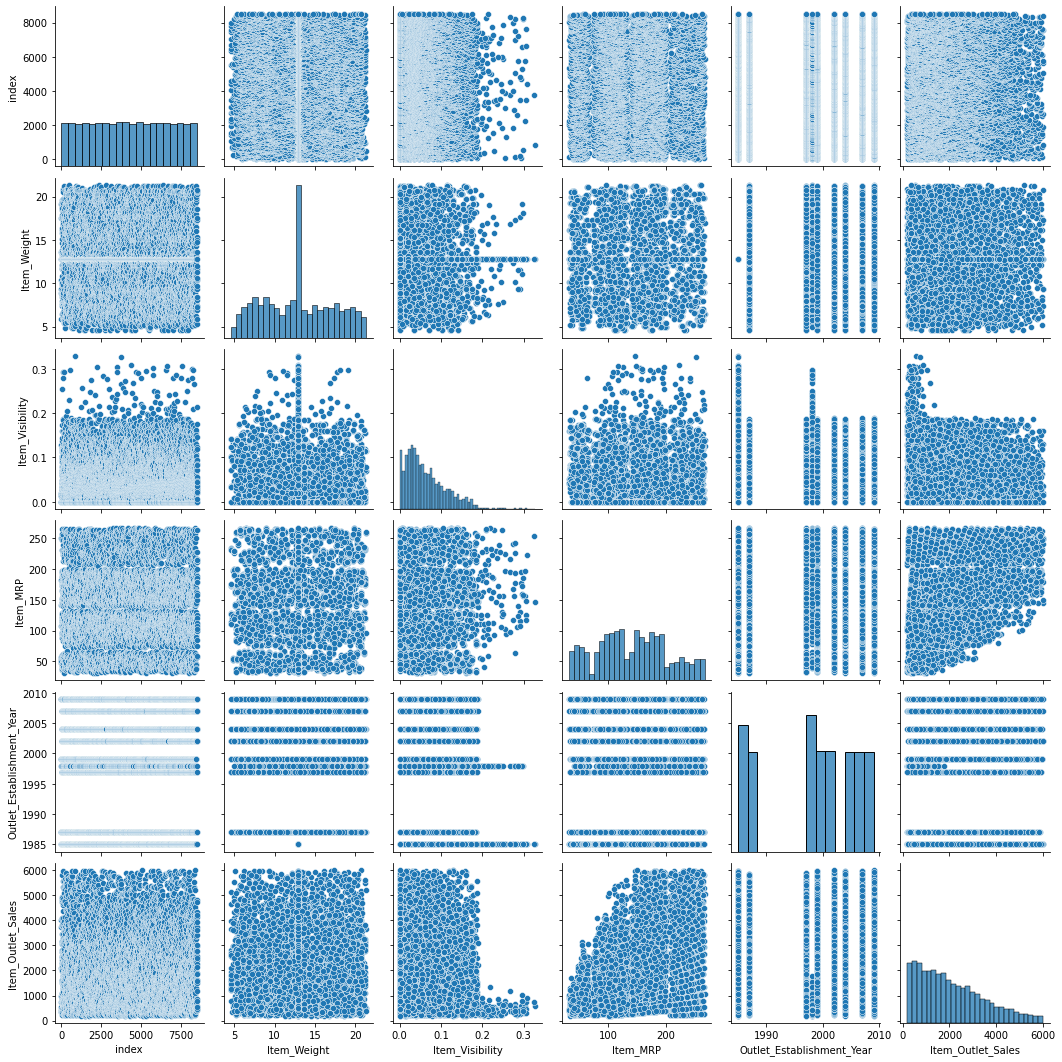

In [526]:
# visualizing relationships between variables
_ = sns.pairplot(BigMart_cleaned)

##### *Selecting 'Item_MRP' as the only numerical feature*

### Feature selection for categorical variables

In [527]:
# getting all the relevant categorical features
from sklearn.feature_selection import SelectKBest, f_regression
y = BigMart_cleaned.loc[:, 'Item_Outlet_Sales']
FeatureSelector = SelectKBest(score_func=f_regression, k=40)
X_cat_new = FeatureSelector.fit_transform(X_cat, y)
X_cat_new = pd.DataFrame(X_cat_new)
X_cat_new.columns = FeatureSelector.get_feature_names_out()

In [528]:
# getting our training data
X_train = pd.concat((X_cat_new, BigMart_cleaned.loc[:, 'Item_MRP']), axis=1)
y_train = BigMart_cleaned.loc[:, 'Item_Outlet_Sales']

### Modeling the data

In [529]:
# using Random Forest Regressor to model the data
from sklearn.ensemble import RandomForestRegressor
sale_predictor = RandomForestRegressor(n_estimators=100)
sale_predictor.fit(X_train, y_train)

RandomForestRegressor()

In [530]:
# predicting training data
list(zip(y_train, sale_predictor.predict(X_train)))

[(3735.138, 4081.167575999997),
 (443.4228, 571.8489620000001),
 (2097.27, 2172.711797999998),
 (732.38, 749.2713459999997),
 (994.7052, 856.5716739999988),
 (556.6088, 634.7137980000007),
 (343.5528, 474.6488199999996),
 (4022.7636, 3222.7050300000033),
 (1076.5986, 1298.9891159999984),
 (4710.535, 3919.085223999995),
 (1516.0266, 1280.9592519999985),
 (2187.153, 2144.9279639999977),
 (1589.2646, 1969.1634219999978),
 (2145.2076, 2179.995649999997),
 (1977.426, 1940.9801080000036),
 (1547.3192, 1221.4567059999988),
 (1621.8888, 1672.4429939999975),
 (718.3982, 793.9531840000002),
 (2303.668, 2712.083036000003),
 (2748.4224, 2835.542330000002),
 (3775.086, 3736.9356600000033),
 (4064.0432, 4151.762350000005),
 (1587.2672, 2093.601442000001),
 (214.3876, 242.45106999999956),
 (4078.025, 3496.075852000002),
 (838.908, 830.7319759999998),
 (1065.28, 952.0740259999993),
 (308.9312, 544.8973779999997),
 (2741.7644, 2261.442963999997),
 (3068.0064, 3083.066796000005),
 (2174.5028, 1985.55541

In [531]:
# finding mean squared error for tarining set
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sale_predictor.predict(X_train))

149592.94660233622

### Applying our model on Test set

In [532]:
# importing train set
BigMart_test1 = pd.read_csv('BigMart_Test.csv')

# handling NaN's
BigMart_test = BigMart_test1.copy()
BigMart_test.Item_Weight.fillna(BigMart_test.Item_Weight.mean(), inplace=True)
BigMart_test.Outlet_Size.fillna(BigMart_test.Outlet_Size.value_counts().index[0], inplace=True)

# handling categorical data
X_cat_test = BigMart_test.loc[:,['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
                             'Outlet_Location_Type','Outlet_Type',]]
ohe_test = OneHotEncoder(sparse=False)
X_cat_test = pd.DataFrame(ohe_test.fit_transform(X_cat_test))
X_cat_test.columns = ohe_test.get_feature_names_out()

# feature selection
col = X_cat_new.columns.to_list()

# getting the training data
X_test = pd.concat((X_cat_test.loc[:,col], BigMart_test.loc[:, 'Item_MRP']), axis=1)

In [533]:
# predicting the Test set
y_pred = sale_predictor.predict(X_test)